In [6]:
import pandas as pd
import pickle5 as pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
# _root_path = '/content/drive/MyDrive/PoliticalSentimentAnalysis/'
_root_path = '../'

plt.rcParams["figure.figsize"] = (8, 4)

# Violine plots

In [2]:
# S140 datset
test_df = pd.read_pickle(_root_path + 'output/data/sentiment_analyser_s140.pkl')
scores = ['bert_score', 'google_score', 'vader_score', 'emolex_score', 'testblob_score']
labels = ['BERT Classifier', 'Google NL API', 'NLTK (VADER)', 'EmoLex', 'TextBlob']
test_df.set_index('label', inplace=True)
test_df = test_df[scores]
test_df.columns = labels
test_df = test_df.stack()
test_df = test_df.to_frame().reset_index()
test_df.columns = ['Ground Truth', 'Model', 'Polarity']

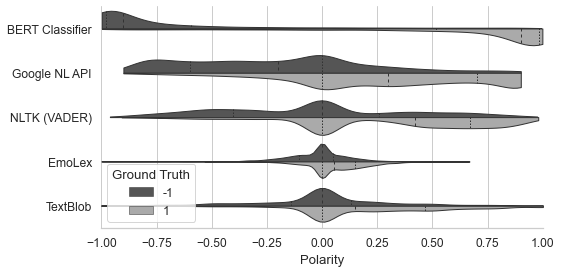

In [7]:
# set default matplotlib param
sns.set_theme(style="whitegrid", font_scale=1.1)

sns.violinplot(data=test_df, x="Polarity", y="Model", hue="Ground Truth",
               split=True, inner="quart", linewidth=1, cut=0.,
               palette='gray')

sns.despine(left=True)
plt.xlim((-1, 1))
plt.ylabel('')
plt.tight_layout()
plt.savefig(_root_path + 'output/figures/experiments/sentiment_analyser_violin_s140.png')
plt.show()

In [9]:
# US congress
test_df = pd.read_pickle(_root_path + 'output/data/sentiment_analyser_UScongress.pkl')
scores = ['bert_score', 'google_score', 'vader_score', 'emolex_score', 'testblob_score']
labels = ['BERT Classifier', 'Google NL API', 'NLTK (VADER)', 'EmoLex', 'TextBlob']
test_df = test_df[scores]
test_df.columns = labels
test_df = test_df.stack()
test_df = test_df.to_frame().reset_index()
test_df.columns = ['Idx', 'Model', 'Polarity']

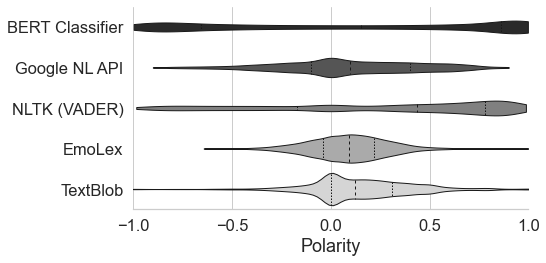

In [12]:
sns.set_theme(style="whitegrid", font_scale=1.5)

sns.violinplot(data=test_df, x="Polarity", y="Model", inner="quart", linewidth=1,
               palette='gray', cut=0.)

sns.despine(left=True)
plt.xlim((-1, 1))
plt.ylabel('')
plt.tight_layout()
plt.savefig(_root_path + 'output/figures/experiments/sentiment_analyser_violin_UScongress.png')
plt.show()

# Correlation matrix and kappa values

In [7]:
# agreement between classifiers
from agreement.utils.transform import pivot_table_frequency
from agreement.metrics import cohens_kappa, krippendorffs_alpha
from agreement.utils.kernels import linear_kernel

def get_kappa(n, m):
  dataset = test_df[[n, m]].stack().reset_index().values
  questions_answers_table = pivot_table_frequency(dataset[:, 0], dataset[:, 2])
  users_answers_table = pivot_table_frequency(dataset[:, 1], dataset[:, 2])
  # return krippendorffs_alpha(questions_answers_table)
  return cohens_kappa(questions_answers_table, users_answers_table, weights_kernel=linear_kernel)

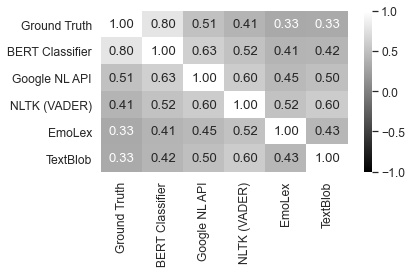

/Users/benediktblumenstiel/opt/miniconda3/envs/PSA/lib/python3.9/site-packages/agreement/metrics.py:52: RuntimeWarning: invalid value encountered in true_divide
  s2 = (pg - rpbar) / (r - 1)


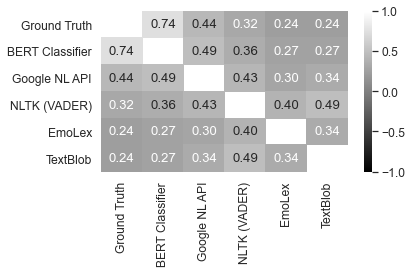

In [8]:
test_df = pd.read_pickle(_root_path + 'output/data/sentiment_analyser_s140.pkl')

scores = ['label', 'bert_score', 'google_score', 'vader_score', 'emolex_score', 'testblob_score']
preds = ['label', 'bert_pred', 'google_pred', 'vader_pred', 'emolex_pred', 'testblob_pred']
labels = ['Ground Truth', 'BERT Classifier', 'Google NL API', 'NLTK (VADER)', 'EmoLex', 'TextBlob']
# create correlation matrix
corr_matrix = test_df[scores].corr()

# plot matrix
sns.heatmap(corr_matrix, annot=True, cmap='gray', vmin=-1., vmax=1., xticklabels=labels, yticklabels=labels, fmt='.2f')
plt.tick_params(bottom=False, left=False)
plt.tight_layout()
plt.savefig(_root_path + 'output/figures/experiments/sentiment_analyser_correlation_s140.png')
plt.show()

# kappa matrix
kappa = pd.DataFrame(index=preds, columns=preds)
for n in preds:
  for m in preds:
    kappa.at[n, m] = get_kappa(n, m)
kappa = kappa.astype(float)

sns.heatmap(kappa, annot=True, cmap='gray', vmin=-1., vmax=1., xticklabels=labels, yticklabels=labels, fmt='.2f')
plt.tick_params(bottom=False, left=False)
plt.tight_layout()
plt.savefig(_root_path + 'output/figures/experiments/sentiment_analyser_kappa_s140.png')
plt.show()

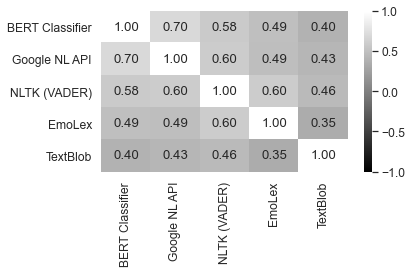

/Users/benediktblumenstiel/opt/miniconda3/envs/PSA/lib/python3.9/site-packages/agreement/metrics.py:52: RuntimeWarning: invalid value encountered in true_divide
  s2 = (pg - rpbar) / (r - 1)


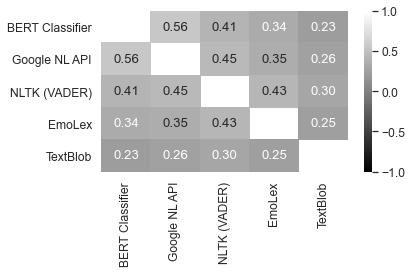

In [9]:
test_df = pd.read_pickle(_root_path + 'output/data/sentiment_analyser_UScongress.pkl')

scores = ['bert_score', 'google_score', 'vader_score', 'emolex_score', 'testblob_score']
preds = ['bert_pred', 'google_pred', 'vader_pred', 'emolex_pred', 'testblob_pred']
labels = ['BERT Classifier', 'Google NL API', 'NLTK (VADER)', 'EmoLex', 'TextBlob']
# create correlation matrix
corr_matrix = test_df[scores].corr()

# plot matrix
sns.heatmap(corr_matrix, annot=True, cmap='gray', vmin=-1., vmax=1., xticklabels=labels, yticklabels=labels, fmt='.2f')
plt.tick_params(bottom=False, left=False)
plt.tight_layout()
plt.savefig(_root_path + 'output/figures/experiments/sentiment_analyser_correlation_UScongress.png')
plt.show()

# kappa matrix
kappa = pd.DataFrame(index=preds, columns=preds)
for n in preds:
  for m in preds:
    kappa.at[n, m] = get_kappa(n, m)
kappa = kappa.astype(float)

sns.heatmap(kappa, annot=True, cmap='gray', vmin=-1., vmax=1., xticklabels=labels, yticklabels=labels, fmt='.2f')
plt.tick_params(bottom=False, left=False)
plt.tight_layout()
plt.savefig(_root_path + 'output/figures/experiments/sentiment_analyser_kappa_UScongress.png')
plt.show()

# Metrics for s140

In [12]:
test_df = pd.read_pickle(_root_path + 'output/data/sentiment_analyser_s140.pkl')
classifier = ['bert', 'google', 'vader', 'emolex', 'testblob']
metrics = pd.DataFrame(index=classifier, columns=['MSE', 'Accurancy', 'F1-Score'])

for c in classifier:
    metrics.at[c, 'MSE'] = mean_squared_error(test_df.label, test_df[c + '_score'])
    metrics.at[c, 'Accurancy'] = accuracy_score(test_df.label, test_df[c + '_pred'], normalize=True)
    metrics.at[c, 'F1-Score'] = f1_score(test_df.label, test_df[c + '_pred'], labels=[-1, 1], average='micro')
metrics = metrics.astype(float).round(4)
metrics.index = ['BERT Classifier', 'Google NL API', 'NLTK (VADER)', 'EmoLex', 'TextBlob']

metrics.to_excel(_root_path + 'output/data/sentiment_analyser_metrics_s140.xlsx')
metrics

,MSE,Accurancy,F1-Score
BERT Classifier,0.3664,0.8630,0.8704
Google NL API,0.7397,0.6518,0.6998
NLTK (VADER),0.8515,0.5254,0.6072
EmoLex,0.9263,0.4305,0.5310
TextBlob,0.9006,0.4262,0.5272
